In [43]:
import numpy as np
import pandas as pd
df = pd.read_csv('medical_cost_data.csv')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 81 entries, 0 to 80
Data columns (total 6 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Age               81 non-null     int64  
 1   BMI               81 non-null     float64
 2   Num_of_Diseases   81 non-null     int64  
 3   Annual_Income     81 non-null     int64  
 4   Days_in_Hospital  81 non-null     int64  
 5   Medical_Cost      81 non-null     int64  
dtypes: float64(1), int64(5)
memory usage: 3.9 KB


In [45]:
#---check for null values---
print("Nulls")
print("=====")
print(df.isnull().sum())

Nulls
=====
Age                 0
BMI                 0
Num_of_Diseases     0
Annual_Income       0
Days_in_Hospital    0
Medical_Cost        0
dtype: int64


In [47]:
corr = df.corr()
print(corr)

                       Age       BMI  Num_of_Diseases  Annual_Income  \
Age               1.000000  0.978218         0.859329       0.955853   
BMI               0.978218  1.000000         0.888759       0.919504   
Num_of_Diseases   0.859329  0.888759         1.000000       0.770489   
Annual_Income     0.955853  0.919504         0.770489       1.000000   
Days_in_Hospital  0.907494  0.891066         0.890575       0.881084   
Medical_Cost      0.945103  0.935188         0.926756       0.918591   

                  Days_in_Hospital  Medical_Cost  
Age                       0.907494      0.945103  
BMI                       0.891066      0.935188  
Num_of_Diseases           0.890575      0.926756  
Annual_Income             0.881084      0.918591  
Days_in_Hospital          1.000000      0.962268  
Medical_Cost              0.962268      1.000000  


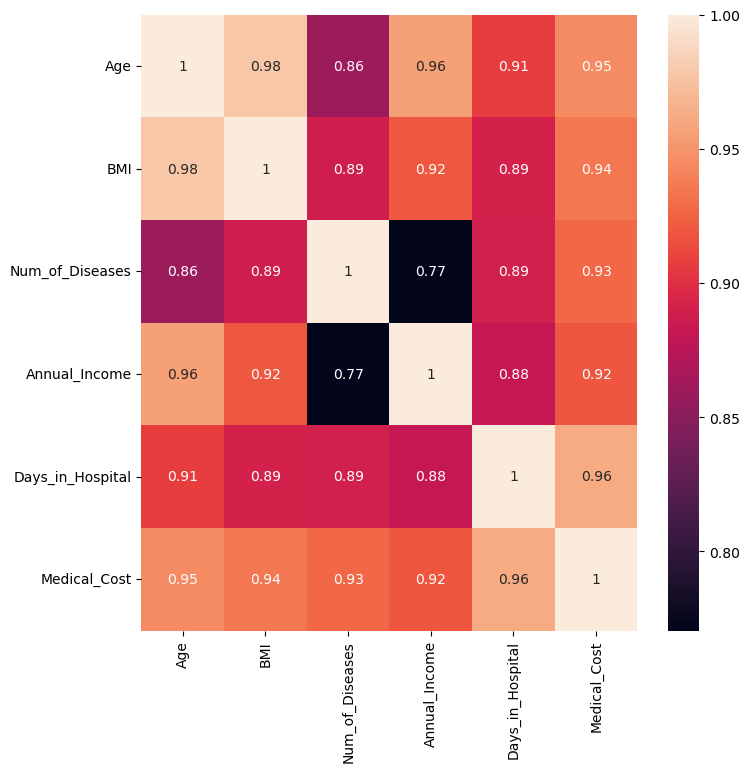

In [49]:
%matplotlib inline
import seaborn as sns
import matplotlib.pyplot as plt
sns.heatmap(df.corr(),annot=True)
#---get a reference to the current figure and set its size---
fig = plt.gcf()
fig.set_size_inches(8,8)

In [51]:
import pandas as pd
from sklearn.model_selection import train_test_split, KFold, GridSearchCV
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error
import numpy as np

# Giả sử bạn đã có DataFrame df và đã normalize dữ liệu
# df = pd.read_csv('your_file.csv')
# df[columns_to_normalize] = scaler.fit_transform(df[columns_to_normalize])

# Chia dữ liệu thành các biến độc lập và biến mục tiêu
X = df.drop('Medical_Cost', axis=1)
y = df['Medical_Cost']

# Chia dữ liệu thành tập huấn luyện và tập kiểm tra
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Tìm giá trị k tối ưu bằng cách sử dụng GridSearchCV
param_grid = {'n_neighbors': np.arange(1, 21)}
knn = KNeighborsRegressor()
grid_search = GridSearchCV(knn, param_grid, cv=5, scoring='neg_mean_squared_error')
grid_search.fit(X_train, y_train)

# In giá trị k tối ưu
optimal_k = grid_search.best_params_['n_neighbors']
print(f'Giá trị k tối ưu: {optimal_k}')

# Đánh giá mô hình với giá trị k tối ưu
best_knn = KNeighborsRegressor(n_neighbors=optimal_k)
best_knn.fit(X_train, y_train)
y_pred = best_knn.predict(X_test)

# Tính các chỉ số đánh giá
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
mape = np.mean(np.abs((y_test - y_pred) / y_test)) * 100

print(f'MAE: {mae}')
print(f'MSE: {mse}')
print(f'MAPE: {mape}')


Giá trị k tối ưu: 1
MAE: 135.2941176470588
MSE: 57941.17647058824
MAPE: 8.93597686204797


In [53]:
model = KNeighborsRegressor(n_neighbors=1)
model.fit(X, y)

KNeighborsRegressor(n_neighbors=1)

In [55]:
import pickle
#---save the model to disk---
filename = 'medical_cost_prediction_model.sav'
#---write to the file using write and binary mode---
pickle.dump(model, open(filename, 'wb'))

In [57]:
#---load the model from disk---
loaded_model = pickle.load(open(filename, 'rb'))

In [59]:
new_data = pd.DataFrame({
    'Age': [45],
    'BMI': [27.8],
    'Num_of_Diseases': [3],
    'Annual_Income': [50000],
    'Days_in_Hospital': [5]
})

# Dự đoán với dữ liệu mới
predictions = loaded_model.predict(new_data)

print(f'Dự đoán chi phí y tế: {predictions[0]}')

Dự đoán chi phí y tế: 3500.0
